In [2]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

(1874, 2700)


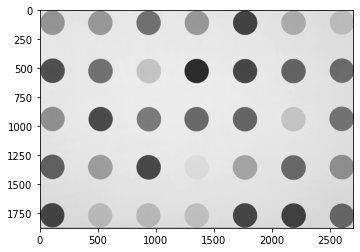

In [18]:
#p=input("enter path of cover image")
cover=cv2.imread('images/'+input(),0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


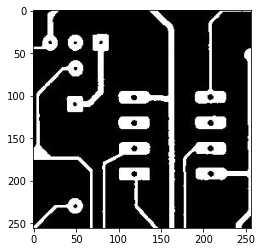

In [20]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

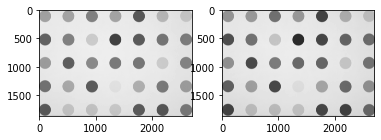

In [21]:
def ab(i1):
    if i1<0:
        return -i1
    return i1
def stego_pvd_encode(cover,msg):
    cover1d=cover.flatten()
    msg1d=msg.flatten()
    byt_str=''
    for i in range(msg1d.shape[0]):
        byt_str+=format(int(msg1d[i]),'08b')
    mtb=0
    n=len(byt_str)
    i=0
    while mtb<n:
        if cover1d[i]>cover1d[i+1]:
            diff=cover1d[i]-cover1d[i+1]
        else:
            diff=cover1d[i+1]-cover1d[i]
        #print('co',cover1d[i],cover1d[i+1],diff)
        if diff>=0 and diff<8:
            bits=2
            low=0
            high=8
        elif diff>=8 and diff<16:
            bits=3
            low=8
            high=16
        elif diff>=16 and diff<32:
            bits=4
            low=16
            high=32
        elif diff>=32 and diff<64:
            bits=5
            low=32
            high=64
        elif diff>=64 and diff<128:
            bits=6
            low=64
            high=128
        elif diff>=128 and diff<256:
            bits=7
            low=128
            high=256
        ac_diff=(int(byt_str[mtb:mtb+bits],2)+low)-diff
        mtb+=bits
        half=ac_diff//2
        if bits==2:
            if cover1d[i]>cover1d[i+1]:
                if cover1d[i+1]>8:
                    cover1d[i+1]-=ac_diff
                elif cover1d[i+1]<=8:
                    cover1d[i]+=ac_diff
            else:
                if cover1d[i+1]>8:
                    cover1d[i]-=ac_diff
                elif cover1d[i+1]<=8:
                    cover1d[i+1]+=ac_diff
        else:
            if cover1d[i]>=cover1d[i+1]:
                cover1d[i]+=half
                cover1d[i+1]-=ac_diff-half    
            else:
                cover1d[i]-=half
                cover1d[i+1]+=ac_diff-half
        i+=2
    return cover1d.reshape(cover.shape[0],cover.shape[1])

cover_stego_pvd=stego_pvd_encode(cover,msg)
plt.subplot(1,2,1)
plt.imshow(cover_stego_pvd,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cover,cmap='gray')
plt.show()


In [22]:
from skimage import metrics
print(metrics.mean_squared_error(cover,cover_stego_pvd))
print(metrics.peak_signal_noise_ratio(cover,cover_stego_pvd))
print(metrics.structural_similarity(cover,cover_stego_pvd))

1.3284256294715207
46.89743114966343
0.9971954038043928
